In [44]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

In [45]:
def load_data(filename='data/data_tp1'):
    """
    Load data from file. Each line must have the format:\n
    <label>,<feature1>,<feature2>,...,<featureN>
    """
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, 1:]
    y = data[:, 0].astype(int)
    return X, y

In [46]:
X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
def build_models(units):
    """
    Build models with a single hidden layer and a given number of units.
    """
    models = []
    for unit in units:
        model = keras.Sequential()
        model.add(keras.layers.InputLayer(input_shape=(784,)))
        model.add(keras.layers.Dense(unit, activation='sigmoid'))
        model.add(keras.layers.Dense(10, activation='softmax'))
        models.append(model)
    return models

In [48]:
units_in_hidden_layers = [25, 50, 100]
learning_rates = [.01, .5, 1, 10]
gd_types = {X_train.size: 'Gradient Descent', 1:'Stochastic Gradient Descent', 10: 'Mini-Batch ', 50: 'Mini-Batch'}

models = build_models(units_in_hidden_layers)
model_25, model_50, model_100 = models


In [56]:
line_styles = ['-', '--', '-.', ':']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', '+', 'x', 'D']

def plot_loss(model, X_train, y_train, X_test, y_test):
    """
    Plot the loss of the model for different learning rates and gradient descent types.
    """
    plt.figure(figsize=(20, 12))

    for gd_type in gd_types:
        for lr in learning_rates:
            random_line_style = random.choice(line_styles)
            random_marker = random.choice(markers)
            model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train, y_train, epochs=100, shuffle = True, batch_size=gd_type, validation_data=(X_test, y_test), verbose=0)

            if gd_type == 10 or gd_type == 50:
                plt.plot(history.history['loss'],random_line_style + random_marker, label=f'{gd_types[gd_type]}, Batch Size: {gd_type}, Learning Rate: {lr}')
            else:
                plt.plot(history.history['loss'], label=f'{gd_types[gd_type]}, Learning Rate: {lr}')


    plt.title(f"{model.layers[0].units} hidden units - Log Scale")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.legend(loc='upper left')

    plt.show()

## Rede com 25 unidades na camada oculta

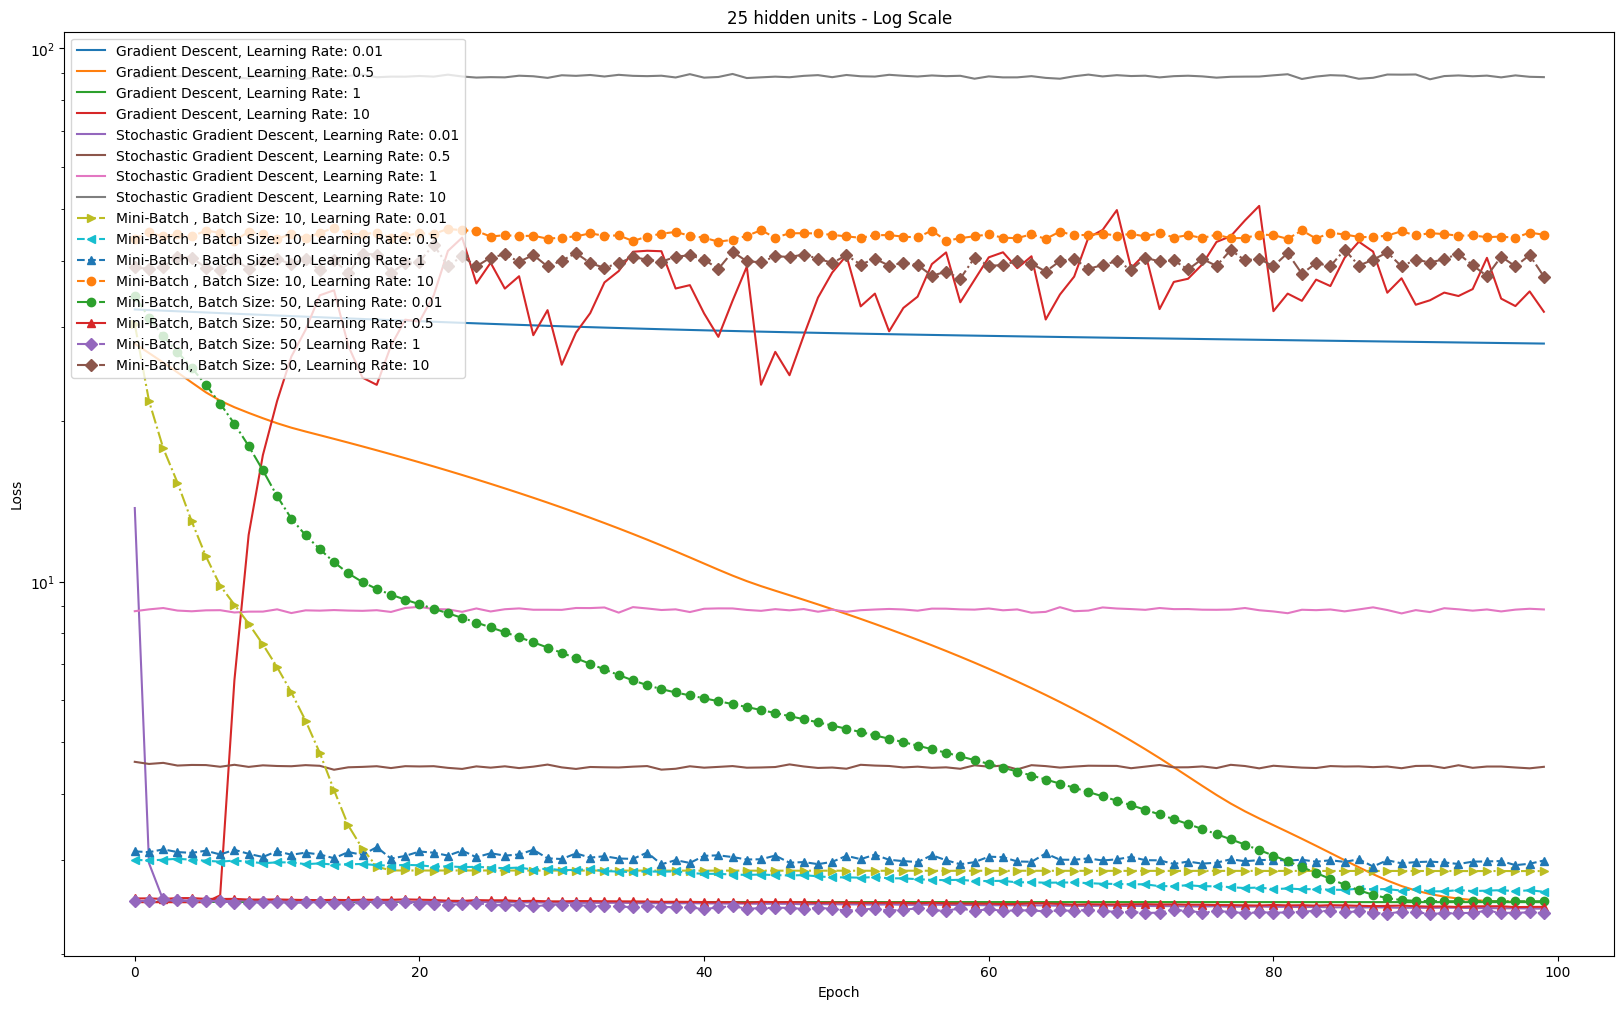

In [57]:
plot_loss(model_25, X_train, y_train, X_test, y_test)

## Rede com 50 unidades na camada oculta

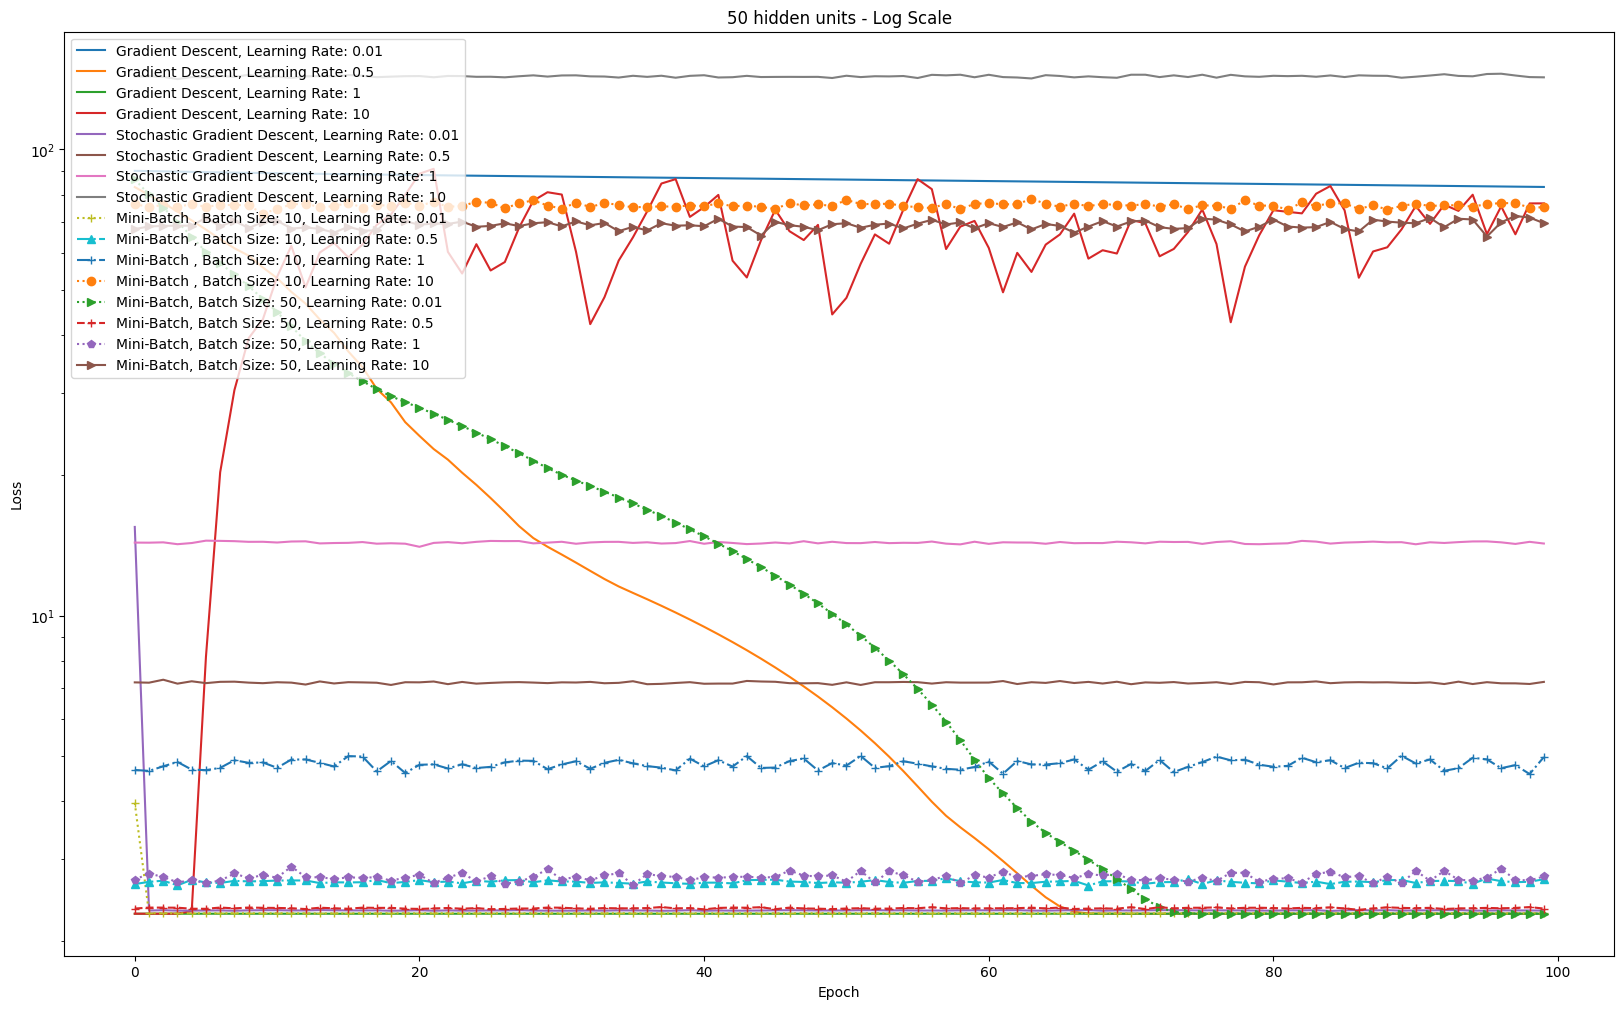

In [58]:
plot_loss(model_50, X_train, y_train, X_test, y_test)

## Rede com 100 unidades na camada oculta


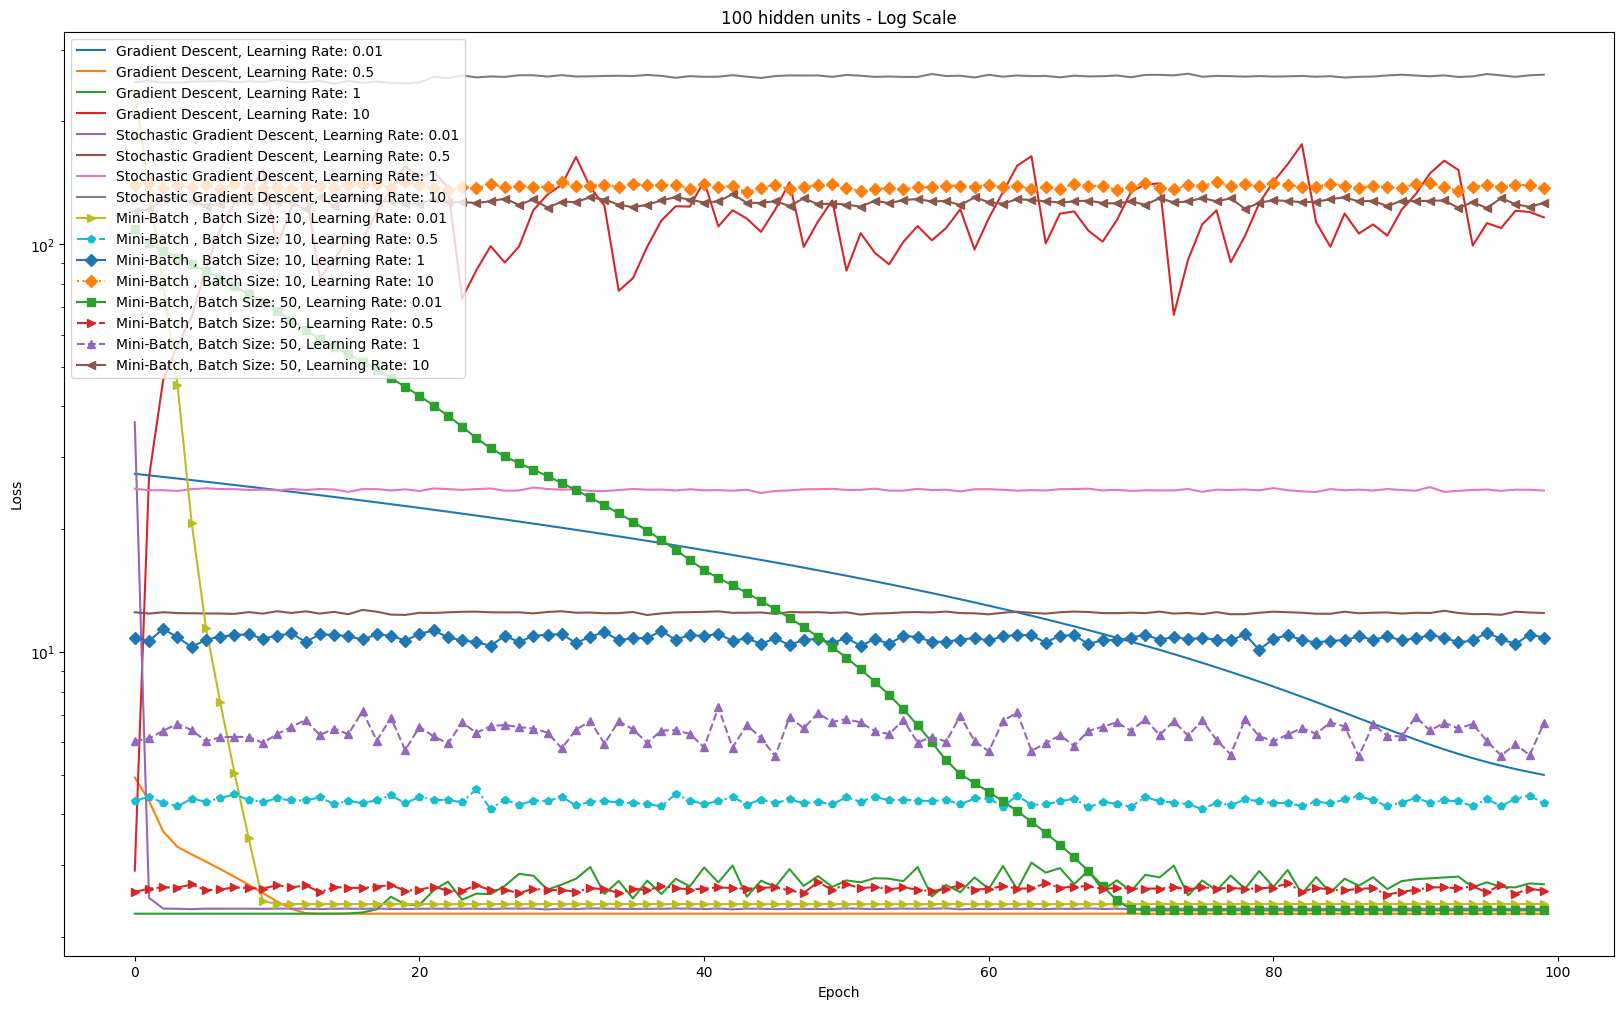

In [59]:
plot_loss(model_100, X_train, y_train, X_test, y_test)

# Resultados Gerais
Os gráficos acima representam a função de perda (loss) nos dados de treino em relação ao número de épocas para diferentes configurações de hiperparâmetros.
## Métodos de Gradiente Descendente
Dentre os métodos avaliados para minimização da função de perda - Gradiente Descendente (GD), Gradiente Descendente Estocástico (SGD), e Mini-Batch SGD - o último foi o que apresentou os melhores resultados, ou seja, a função de perda foi minimizada mais rapidamente. Isso significa que foram necessárias menos épocas para que o modelo atingisse a convergência com um erro significativamente baixo.

Esse comportamento se deve ao fato de que o Mini-Batch SGD é uma combinação dos métodos GD e SGD, o que permite que o modelo seja treinado de forma mais eficiente. O GD é um método que calcula o gradiente da função de perda em relação a todos os exemplos de treinamento, podendo ser computacionalmente caro. O SGD, por outro lado, calcula o gradiente em relação a um único exemplo de treinamento, potencialmente levando a uma convergência mais rápida, porém mais instável. O Mini-Batch SGD calcula o gradiente em relação a um pequeno conjunto de exemplos de treinamento, o que combina a eficiência do GD com a estabilidade do SGD.

Observando as curvas dos respectivos métods, nota-se que o Gradiente descendente apresenta uma convergência mais lenta, pois é calculado em relação a todos os exemplos de treinamento. No entanto, seu comportamento é estável, com uma descida leve e constante da função de perda. O Gradiente Descendente Estocástico, por sua vez, apresenta uma oscilação maior, obtendo valores ora maiores do que os previamente observados.

## Taxas de Aprendizados (Learning rates)
A taxa de aprendizado é um hiperparâmetro que controla o tamanho dos passos que o modelo dá durante o treinamento. Uma taxa de aprendizado muito alta pode fazer com que o modelo pule o mínimo global da função de perda, enquanto uma taxa de aprendizado muito baixa pode fazer com que o modelo leve muito tempo para convergir. Exemplos que melhor ilustram esses comportamentos são Gradiente Descente com taxa de aprendizado 10 e 0.01. Espera-se que o GD apresente uma convergência lenta, porém constante, mas no primeiro caso a função de perda oscila muito, indicando que o modelo está dando passos muito grandes e não está conseguindo convergir. Com learning rate = 0.01, o modelo apresenta uma descida extremamente lenta, sendo incapaz de atingir um valor satisfatório mesmo após 100 épocas.

Observando os gráficos, pode-se afirmar que a taxa de aprendizado deve ser ajustada de acordo com uma séries de fatores o modelo de gradiente, quantidade de dados, complexidade do modelo, entre outros. Obter uma variação maior pode ser interessante para o GD, devido a sua convergência mais lenta, enquanto para o SGD e Mini-Batch SGD, uma taxa de aprendizado menor pode ser mais adequada.

## Número de Unidades na Camada Oculta
O número de unidades na camada oculta é um hiperparâmetro que controla a capacidade do modelo de aprender a função de mapeamento entre as entradas e as saídas. Um número muito baixo de unidades pode fazer com que o modelo seja incapaz de aprender a função de mapeamento, enquanto um número muito alto de unidades pode fazer com que o modelo seja muito complexo e propenso a overfitting.

Pode-se usar validação cruzada para definir o melhor número de unidades na camada oculta. A seguir são mostradas as curvas de perda feita nos dados de teste:

In [60]:
line_styles = ['-', '--', '-.', ':']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', '+', 'x', 'D']

def plot__validation_loss(model, X_train, y_train, X_test, y_test):
    """
    Plot the loss of the model for different learning rates and gradient descent types.
    """
    plt.figure(figsize=(20, 12))

    for gd_type in gd_types:
        for lr in learning_rates:
            random_line_style = random.choice(line_styles)
            random_marker = random.choice(markers)

            model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train, y_train, epochs=100, batch_size=gd_type, validation_data=(X_test, y_test), verbose=0)

            if gd_type == 10 or gd_type == 50:
                plt.plot(history.history['val_loss'], random_line_style + random_marker,  label=f'{gd_types[gd_type]}, Batch Size: {gd_type}, Learning Rate: {lr}')
            else:
                plt.plot(history.history['val_loss'], label=f'{gd_types[gd_type]}, Learning Rate: {lr}')


    plt.title(f"{model.layers[0].units} hidden units - Log Scale")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.yscale('log')
    plt.legend(loc='upper left')

    plt.show()

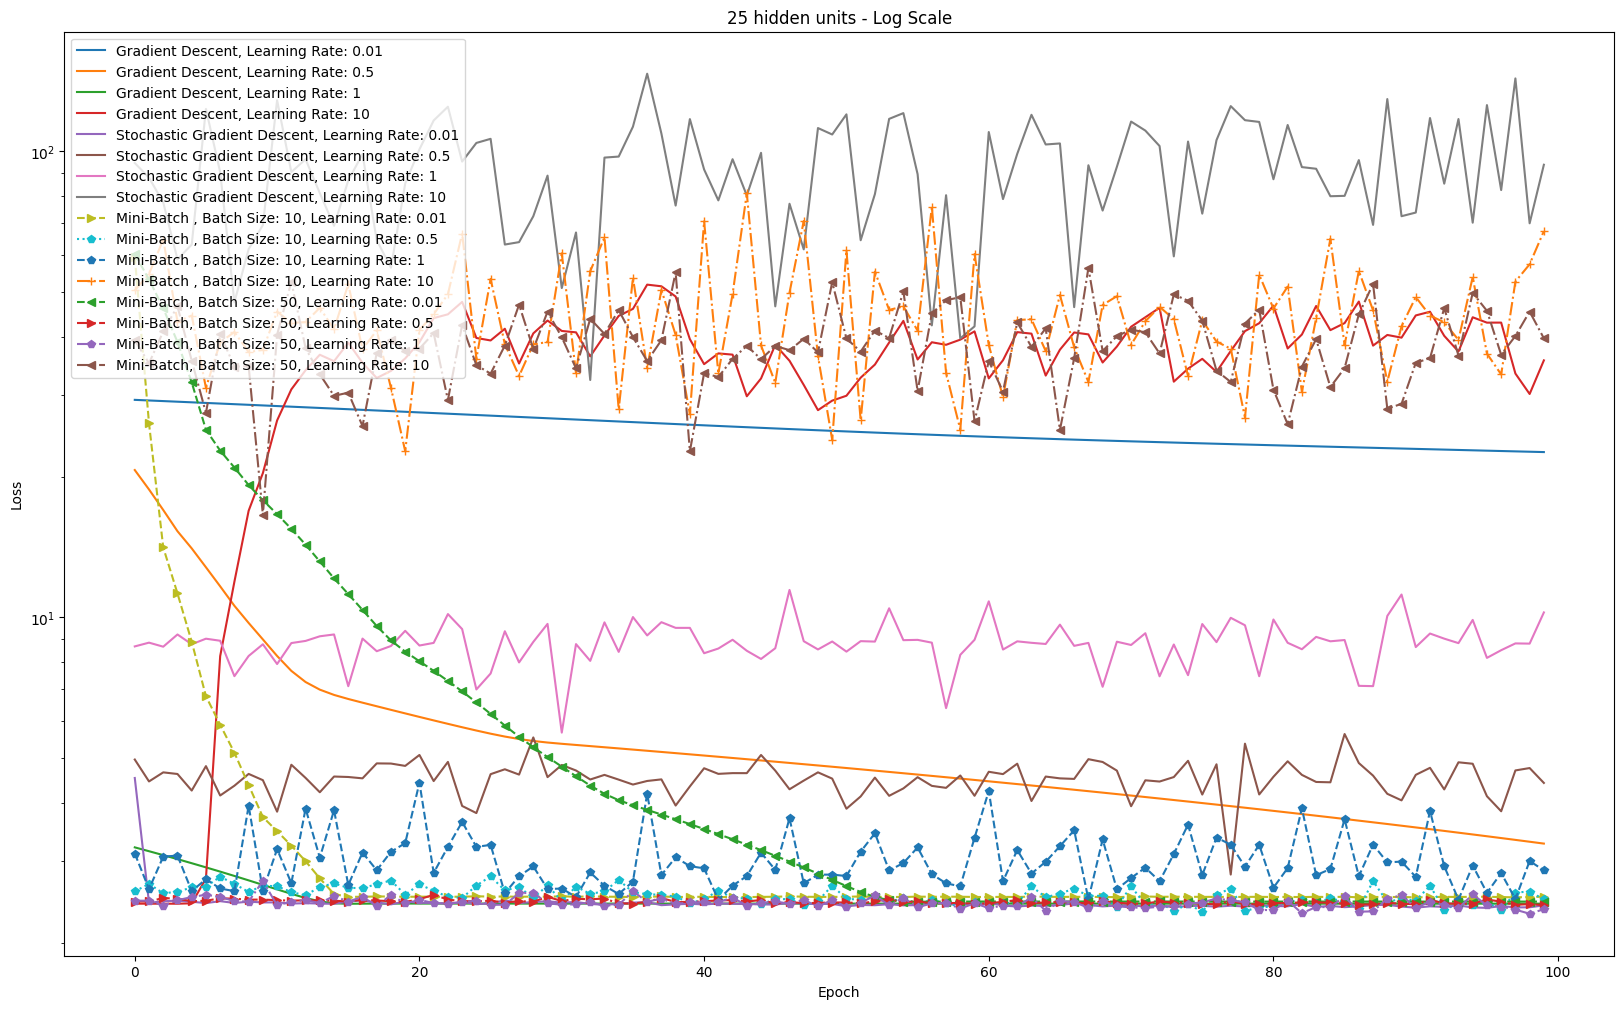

In [61]:
plot__validation_loss(model_25, X_train, y_train, X_test, y_test)

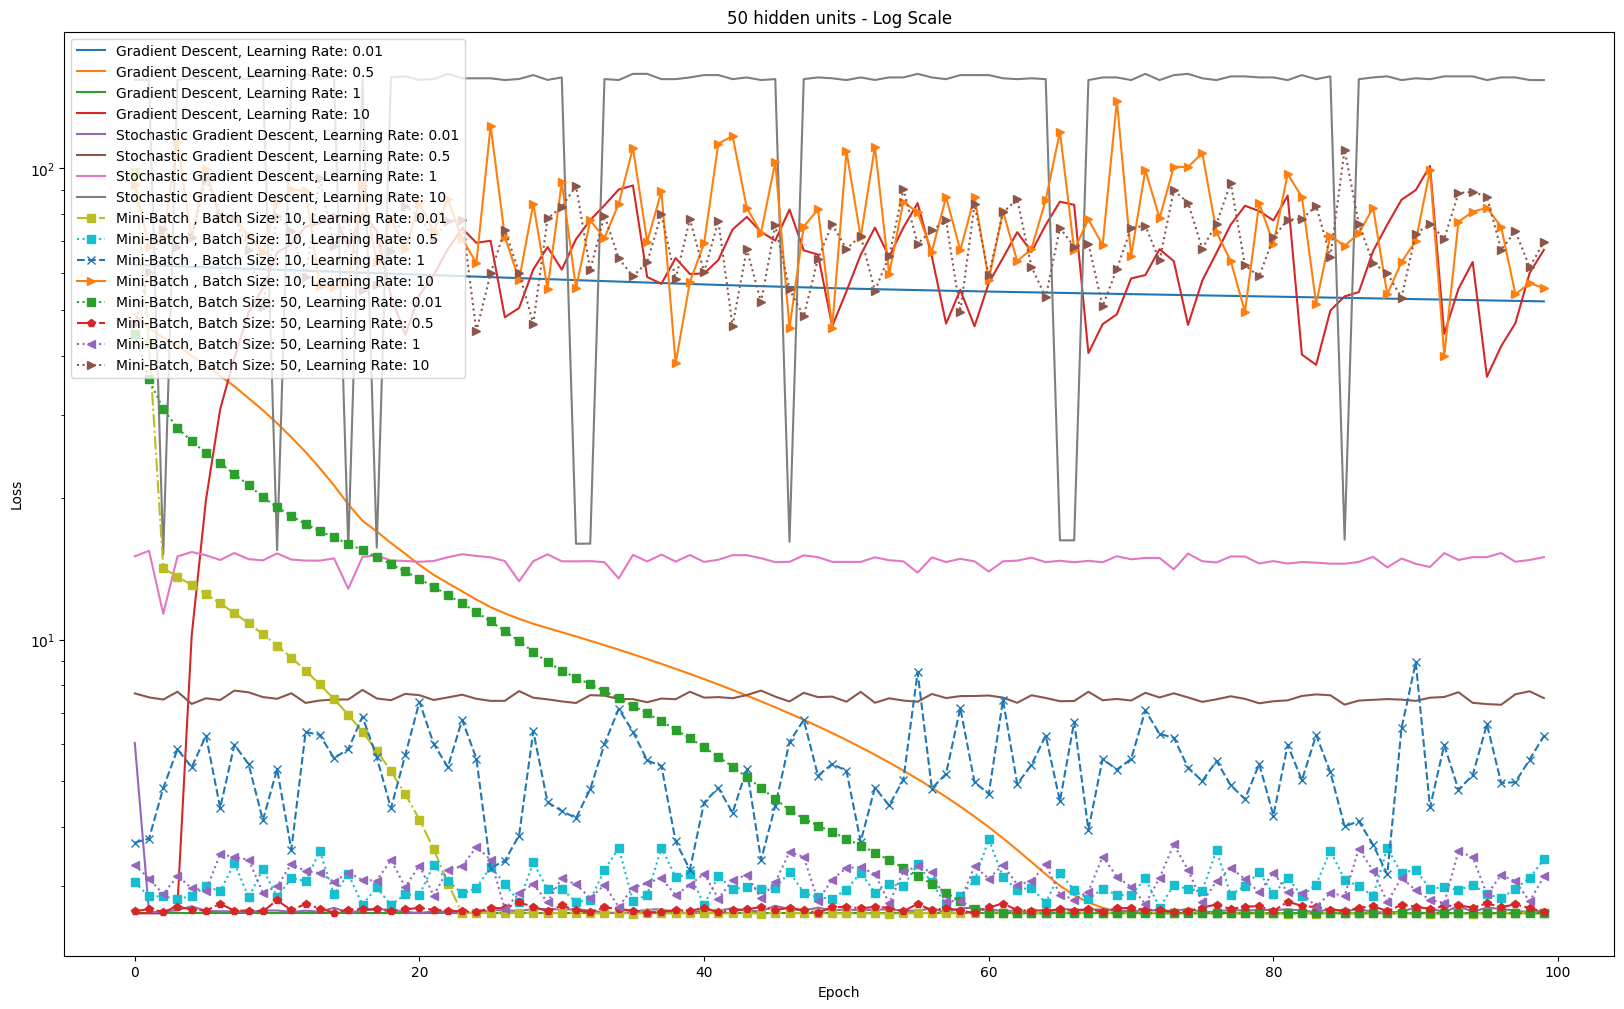

In [63]:
plot__validation_loss(model_50, X_train, y_train, X_test, y_test)

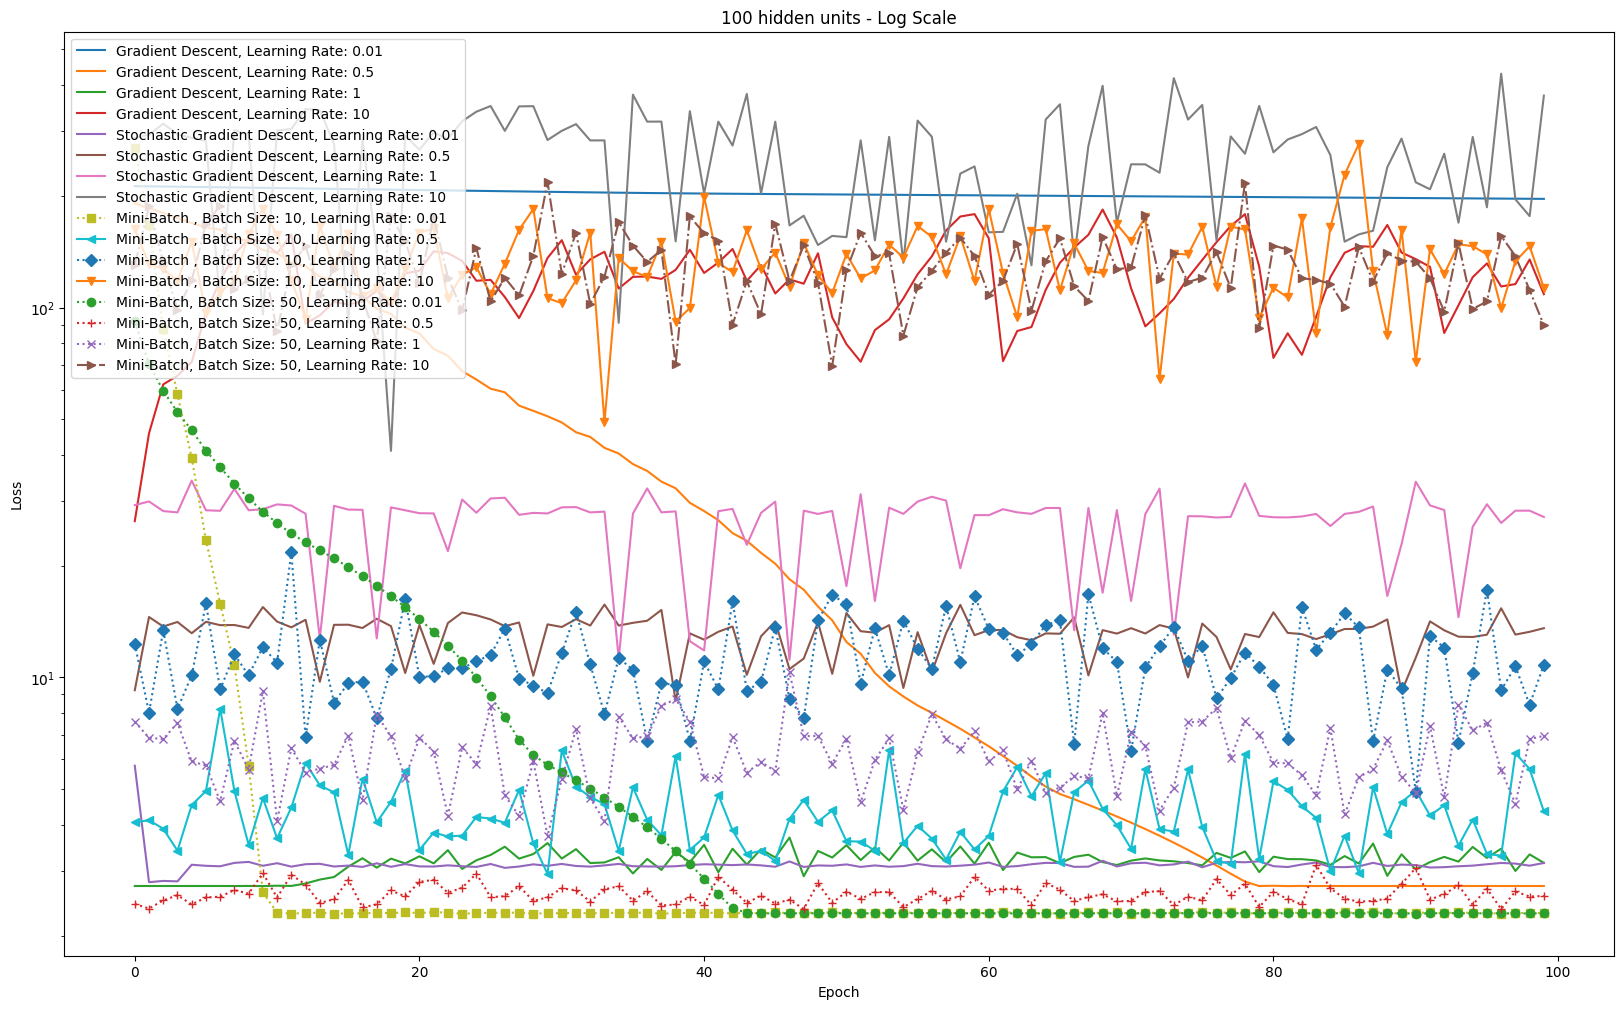

In [64]:
plot__validation_loss(model_100, X_train, y_train, X_test, y_test)

Foi possível observar que as redes de 25 e 50 unidades na camada oculta obtiveram desempenho similar na função de perda para os dados de teste e treino, indicando que não houve overfitting. Aquela com 100, no entanto, possui indícios de não convergência na avaliação - e potencialmente overfitting - para a maioria dos métodos de gradiente.

Sendo assim, ao considerar a simplicidade, eficiência computacional e capacidade de generalização, a rede de 25 unidades na camada oculta é a mais indicada.
